# Selecting a Model to predict Glacier Melt using Temperature:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('glaciers_temperature_df.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


# Linear Regression:

In [3]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression()

In [4]:
y_pred = linear_regressor.predict(X)
y_pred

array([ -9.86208917, -11.64472935, -13.44374929,  -9.15895712,
        -8.55911387,  -6.56917883,  -9.38188639,  -9.90584076,
       -10.53625599,  -6.46656382,  -7.66632702,  -2.15409007,
        -9.16257907, -11.96991694, -10.08537815, -11.08299009,
       -11.55328383,  -8.22267576,  -7.93667231,  -6.47875965,
        -5.56337241, -10.84880728,  -7.25704355,  -6.87391399,
        -9.38391298,  -9.75359238,  -6.58077343,  -7.70016229,
       -10.83609832,  -7.16051868,  -8.86540605,  -5.03432823,
       -11.6377528 ,  -8.77274259, -11.46834319, -10.60902671,
       -11.55188439, -10.54402028, -14.16275686,  -9.20322493,
        -8.38450768,  -9.82475634, -13.66580126, -14.43642971,
       -13.53230016, -17.46132819, -12.89958362, -12.28557289,
       -11.71978573, -16.55036731, -16.76297806, -12.17653602,
       -16.48184674, -21.74805749, -18.60982535, -17.9318448 ,
       -19.13214704, -21.21784712, -20.6389156 , -19.07652202,
       -20.23022819, -20.80202776, -21.87905515, -19.04

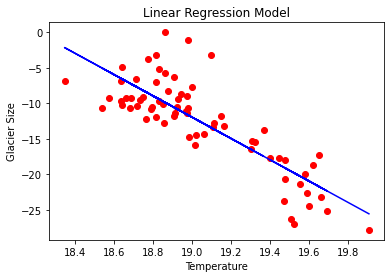

In [5]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor.predict(X), color = 'blue')
plt.title('Linear Regression Model')
plt.xlabel('Temperature')
plt.ylabel('Glacier Size')
plt.show()

In [6]:
linear_regressor.predict([[40]])

array([-326.72702165])

# Polynomial Regression:

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree = 2)
X_poly = poly_regressor.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

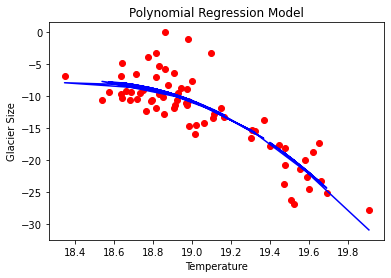

In [8]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_regressor.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression Model')
plt.xlabel('Temperature')
plt.ylabel('Glacier Size')
plt.show()

In [9]:
lin_reg_2.predict(poly_regressor.fit_transform([[40]]))

array([-5358.03060554])

# Support Vector Regression:

In [10]:
svr_y = y.reshape(len(y),1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

svr_X = sc_X.fit_transform(X)
svr_y = sc_y.fit_transform(svr_y)

In [11]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf', degree=2)
# svr_regressor = SVR(kernel = 'poly')
# svr_regressor = SVR(kernel = 'sigmoid')
svr_regressor.fit(svr_X, svr_y)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(degree=2)

In [12]:
sc_y.inverse_transform(svr_regressor.predict(sc_X.transform([[40]])))

array([-15.2996332])

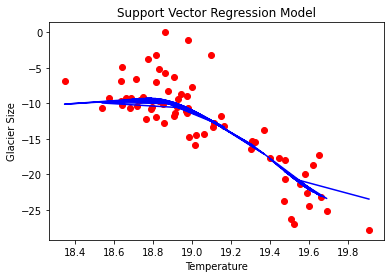

In [13]:
plt.scatter(sc_X.inverse_transform(svr_X), sc_y.inverse_transform(svr_y), color = 'red')
plt.plot(sc_X.inverse_transform(svr_X), sc_y.inverse_transform(svr_regressor.predict(svr_X)), color = 'blue')
plt.title('Support Vector Regression Model')
plt.xlabel('Temperature')
plt.ylabel('Glacier Size')
plt.show()

# Decision Tree Regression

In [14]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [15]:
regressor.predict([[20]])

array([-27.817])

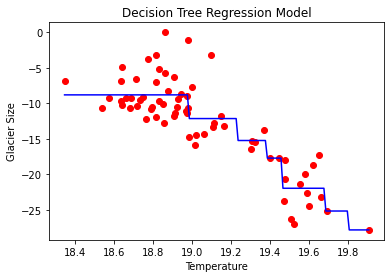

In [16]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression Model')
plt.xlabel('Temperature')
plt.ylabel('Glacier Size')
plt.show()

# Random Forest Regression

In [17]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [18]:
regressor.predict([[50]])

array([-26.383791])

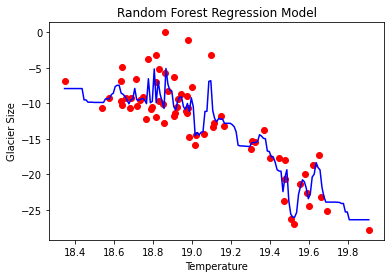

In [19]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression Model')
plt.xlabel('Temperature')
plt.ylabel('Glacier Size')
plt.show()